In [1]:
import boto3
session = boto3.Session(profile_name='esip')
# Any clients created from this session will use credentials
# from the [dev] section of ~/.aws/credentials.
dev_s3_client = session.client('s3')


In [2]:
%matplotlib inline
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt
import rasterio.plot
import os
from datetime import datetime as dt

# Load the veg aso
veg_aso = rio.open(r'/home/ubuntu/planet-snowcover/pipeline/aso_veg_test_only.tif')
veg_aso_mask = veg_aso.read(1)





/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [ ]:
# Plot this elevation band:
plt.figure(figsize=(10,10))
plt.imshow(veg_aso_mask)

title_text = ''
plt.title(title_text);


In [12]:
print(veg_aso_mask.shape)

(26547, 32768)


In [3]:

# Load the DEM and read out a np array of the elevation values (meters):
veg_pred = rio.open(r'/home/ubuntu/planet-snowcover/pipeline/pred_veg_test_only.tif')
pred_veg = veg_pred.read(1)


In [4]:
print(pred_veg.shape)

(26547, 32768)


In [ ]:

# Plot this elevation band:
plt.figure(figsize=(10,10))
plt.imshow(pred_veg)

title_text = ''
plt.title(title_text);

In [4]:
def compute_metrics(true, pred):
    print(true.shape, pred.shape)
    assert true.shape == pred.shape, "Masks and predictions are different shapes. Are you sure they're in the same CRS/extent?"

    compare = (true, pred)

    balanced_acc = metrics.balanced_accuracy_score(*compare)
    prfs = metrics.precision_recall_fscore_support(*compare, average='binary')

    these_metrics = {
        "balanced_accuracy" : balanced_acc,
        "precision": prfs[0],
        "recall": prfs[1],
        "f_score": prfs[2]
    }

    return these_metrics

In [5]:
mask_data = veg_aso_mask.flatten()
pred_data = pred_veg.flatten()
    # remove nodata

In [6]:
mask_data.shape

(869892096,)

In [8]:
 np.unique(mask_data)

array([-3.4e+38,  0.0e+00,  1.0e+00], dtype=float32)

In [9]:
 np.unique(pred_data)

array([-3.4e+38,  0.0e+00,  1.0e+00], dtype=float32)

In [9]:
len(mask_data[np.where(mask_data != 9999)])

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


1

In [10]:
try:
        mask_data = mask_data[np.where(mask_data != -3.4e+38)]
        pred_data = pred_data[np.where(pred_data != -3.4e+38)]
except Exception as e:
        print("Error filtering nodata. Do input data files have nodata attribute set? [{}]".format(e))

In [12]:
 np.unique(pred_data)

array([-3.4e+38,  0.0e+00,  1.0e+00], dtype=float32)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(mask_data, pred_data)

ValueError: continuous is not supported

In [11]:
from sklearn import metrics
metrics = compute_metrics(mask_data, pred_data)

(869892096,) (869892096,)


ValueError: continuous is not supported

In [ ]:
print(metrics)

In [14]:
print(masksnow.shape)

(3073, 6144)


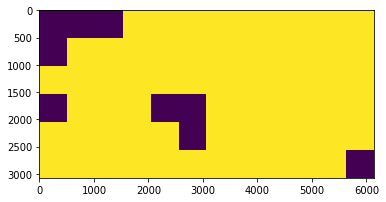

In [29]:
from rasterio.plot import show
show(masksnow)

In [5]:
!gdalinfo /home/ubuntu/s3:::planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif

Driver: GTiff/GeoTIFF
Files: /home/ubuntu/s3:::planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif
Size is 6144, 3073
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-119.630126953125000,38.229550455326141)
Pixel Size = (0.000021457672119,-0.000016856813467)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-119.6301270,  38.2295505) (119d37'48.46"W, 38d13'46.38"N)
Lower Left  (-119.6301270,  38.1777495) (119d37'48.46"W, 38d10'39.90"N)
Upper Right (-119.4982910,  38.2295505) (119d29'53.85"W, 38d13'46.38"N)
Lower Right (-119.4982910,  38.177